In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set()
import warnings; warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv(r'C:/Users/Yash/Downloads/nyc_taxi_final-1560498097450/nyc_taxi_trip_duration.csv')

In [3]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [4]:
df.shape

(729322, 11)

In [5]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [6]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object


    1.We have id, pickup_datetime, dropoff_datetime, and store_and_fwd_flag of the type ‘object’.
    2.vendor_id, passenger_count, and trip_duration are of type int.
    3.pickup_longitude, pickup_latitude, dropoff_longitude, and dropoff_latitude are of type float.
    
    
    Results:
    The columns id and vendor_id are nominal.
    The columns pickup_datetime and dropoff_datetime are stored as object which must be converted to datetime for better analysis.
    The column store_and_fwd_flag is categorical

In [7]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

 There are no null values in this dataset

In [8]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


    There are no numerical columns with missing data
    The passenger count varies between 1 and 9 with most people number of people being 1 or 2
    The trip duration varying from 1s to 1939736s~538 hrs. There are definitely some outliers present which must be treated.

The 2 columns pickup_datetime and dropoff_datetime are now converted to datetime format which makes analysis of date and time data much more easier.

In [9]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])

In [10]:
df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

**Univariate Analysis** 

**Analysing patterns of all variables individually**


**Target Variable- Trip Duration**

<AxesSubplot:xlabel='trip_duration', ylabel='Count'>

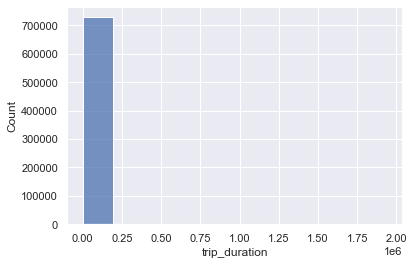

In [11]:
sns.histplot(df['trip_duration'],kde=False,bins=10)

**We got a very Skewed Histogram**

<AxesSubplot:xlabel='trip_duration'>

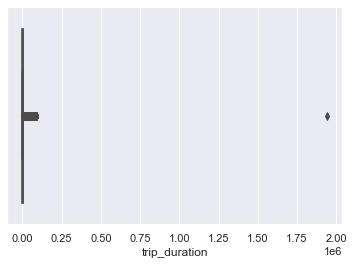

In [12]:
sns.boxplot(df['trip_duration'])

**Outliers can be seen Clearly**

**There is only value near 2000000 while all the others are somewhere between 0 and 100000. The one near 2000000 is definitely an outlier which must be treated**

In [13]:
print( df['trip_duration'].nlargest(10))

21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
90557       86369
673847      86369
163178      86367
179065      86365
248675      86364
Name: trip_duration, dtype: int64


**Replacing Outliers with Mode or median**

In [14]:
df=df[df.trip_duration!=df.trip_duration.max()]

Text(0.5, 1.0, 'Distribution of the pickup ditribution after the treatment of outliers')

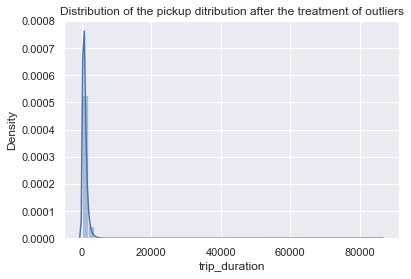

In [15]:
sns.distplot(df['trip_duration'])
plt.title('Distribution of the pickup ditribution after the treatment of outliers')

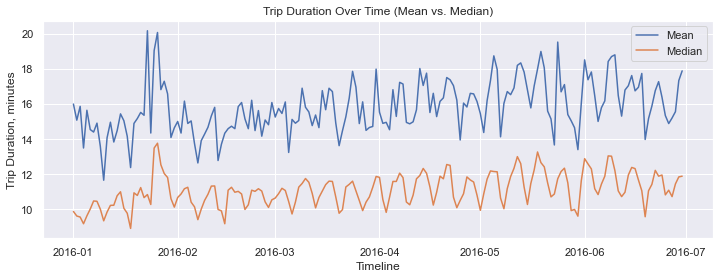

In [16]:
# trip duration time-series by day, mean vs. median
data = df.groupby(df.pickup_datetime.dt.date).aggregate({'trip_duration':['mean', 'median']})/60
plt.figure(figsize=(12,4))
plt.title('Trip Duration Over Time (Mean vs. Median)')
plt.ylabel('Trip Duration, minutes') ; plt.xlabel('Timeline')
plt.plot(data)
plt.legend(['Mean', 'Median'])
pass

**Distribution of pickup longitude**

Text(0.5, 1.0, 'The distribution of Pick up Longitude')

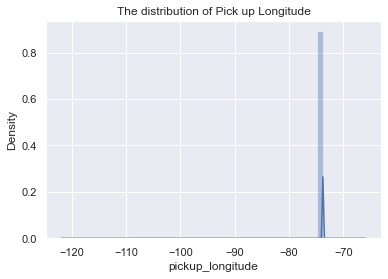

In [17]:
sns.distplot(df['pickup_longitude'])
plt.title('The distribution of Pick up Longitude')

**Distribution of drop off longitude**

Text(0.5, 1.0, 'The distribution of Drop off Longitude')

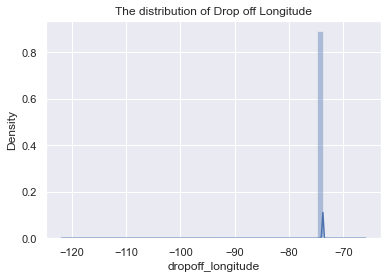

In [18]:
sns.distplot(df['dropoff_longitude'])
plt.title('The distribution of Drop off Longitude')

**Distribution of dropoff latitude**

Text(0.5, 1.0, 'The distribution of drop off Latitude')

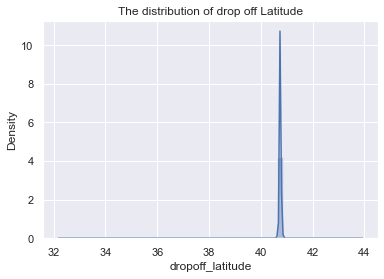

In [19]:
sns.distplot(df['dropoff_latitude'])
plt.title('The distribution of drop off Latitude')

**Distribution of pickup latitude**

Text(0.5, 1.0, 'The distribution of pick up Latitude')

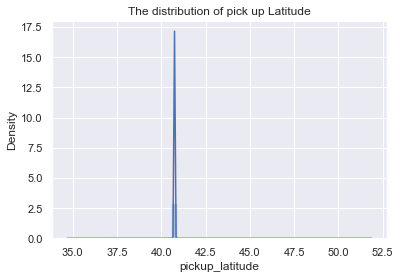

In [20]:
sns.distplot(df['pickup_latitude'])
plt.title('The distribution of pick up Latitude')

**We see that the pickup longitude and the dropoff longitude has almost the same kind of distribution
while the pickup latitude and the dropoff latitude has slightly different distribution**

**Vendor id**

<AxesSubplot:xlabel='vendor_id', ylabel='count'>

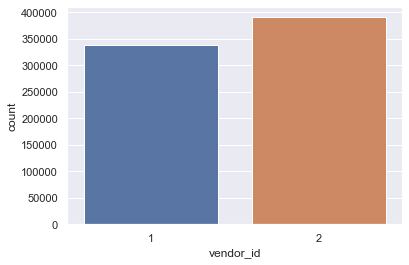

In [21]:
sns.countplot(x='vendor_id',data=df)

**There is not much difference between the trips taken by both vendors, although Vendor 2 has take more trips as comapred to 1**

**Passenger Count**

In [22]:
df.passenger_count.value_counts()

1    517414
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: passenger_count, dtype: int64

**There are some trips with even 0 passenger count**

**There is only 1 trip each for 7 and 9 passengers**

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

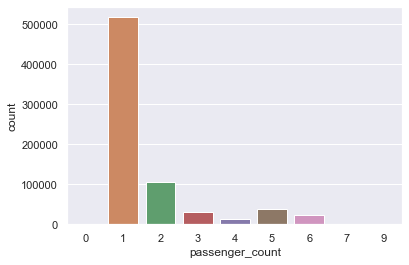

In [23]:
sns.countplot(x='passenger_count',data=df)

**Highest No of Trips are done with single passenger**

**Store and Forward Flag**

In [24]:
df['store_and_fwd_flag'].value_counts(normalize=True)

N    0.994461
Y    0.005539
Name: store_and_fwd_flag, dtype: float64

**less than 1% of trips that were stored before forwarding**

**Passeneger Count**

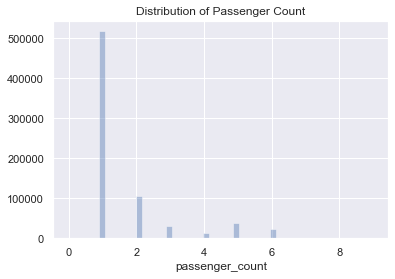

In [25]:
sns.distplot(df['passenger_count'],kde=False)
plt.title('Distribution of Passenger Count')
plt.show()

**Here we see that the mostly 1 or 2 passengers avail the cab. The instance of large group of people travelling together is rare**

**Feature Engineering And Visualisation**

*We now create some new features from the existing variables so that we can gain more insights from the data and  speed-up calculations*

In [26]:
# dow names for plot mapping
dow_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# mm names for plot mapping
mm_names = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]


**TRIPS PER HOURS**

In [27]:
# day hour
df['hh_pickup'] = df.pickup_datetime.dt.hour.astype(np.uint8)
df['hh_dropoff'] = df.dropoff_datetime.dt.hour.astype(np.uint8)

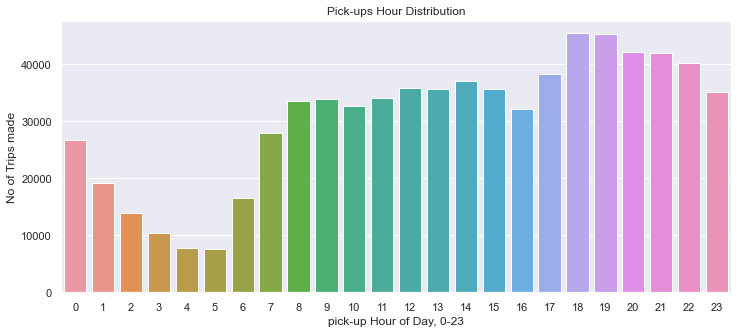

In [28]:
# pickup time distribution, hour-of-day
plt.figure(figsize=(12,5))

data = df.groupby('hh_pickup').aggregate({'id':'count'}).reset_index()
sns.barplot(x='hh_pickup', y='id', data=data)

plt.title('Pick-ups Hour Distribution')
plt.xlabel('pick-up Hour of Day, 0-23')
plt.ylabel('No of Trips made')
pass

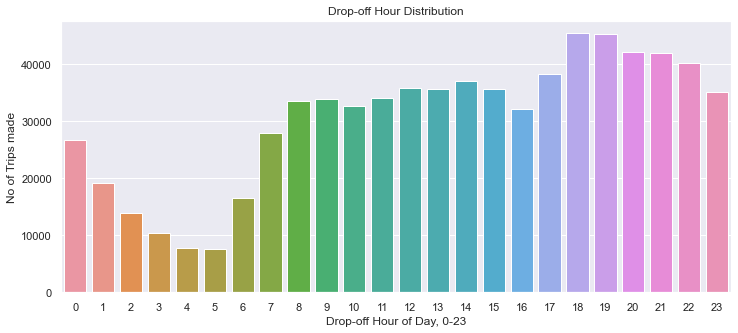

In [29]:
# Drop-off time distribution, hour-of-day
plt.figure(figsize=(12,5))

data = df.groupby('hh_pickup').aggregate({'id':'count'}).reset_index()
sns.barplot(x='hh_pickup', y='id', data=data)

plt.title('Drop-off Hour Distribution')
plt.xlabel('Drop-off Hour of Day, 0-23')
plt.ylabel('No of Trips made')
pass

**Here, we can see that busiest hours are 6:00 pm to 7:00 pm maybe as this is the time when people return from their works while 4-5am in morning are most quietest hours**

 **No of Trips per Day**

In [30]:
# day of week
df['dow_pickup'] = df.pickup_datetime.dt.weekday.astype(np.uint8)
df['dow_dropoff'] = df.dropoff_datetime.dt.weekday.astype(np.uint8)

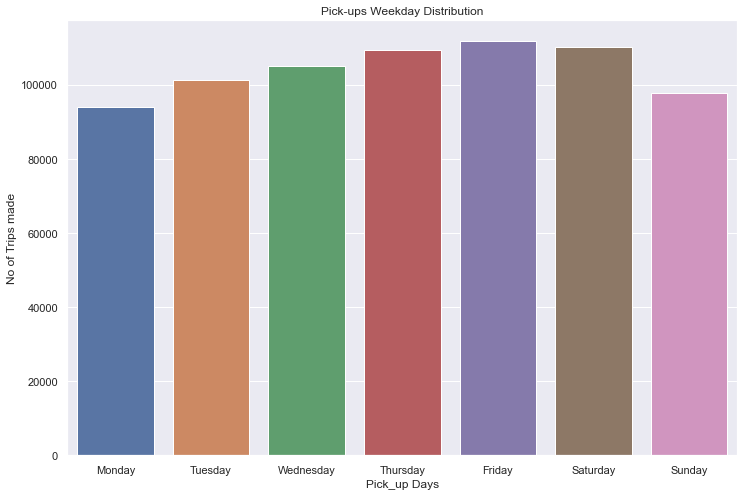

In [31]:
# pickup distribution, by weekday
plt.figure(figsize=(12,8))

data = df.groupby('dow_pickup').aggregate({'id':'count'}).reset_index()
sns.barplot(x='dow_pickup', y='id', data=data)

plt.title('Pick-ups Weekday Distribution')
plt.xlabel('Pick_up Days')
plt.xticks(range(0,7), dow_names, rotation='horizontal')
plt.ylabel('No of Trips made')
pass

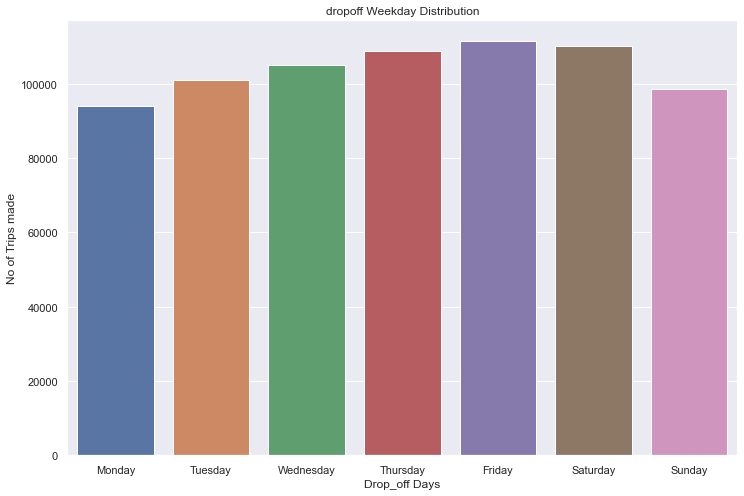

In [32]:
# dropoff distribution, by weekday
plt.figure(figsize=(12,8))

data = df.groupby('dow_dropoff').aggregate({'id':'count'}).reset_index()
sns.barplot(x='dow_dropoff', y='id', data=data)

plt.title('dropoff Weekday Distribution')
plt.xlabel('Drop_off Days')
plt.xticks(range(0,7), dow_names, rotation='horizontal')
plt.ylabel('No of Trips made')
pass

**Fridays are the busiest days followed by Saturdays, probably because it’s starting of the weekends while Sundays are the least busiest as people prefer to spend time with their families and prefer private vehicles for outing rather than cabs**

**Trips Per time of Day**

In [33]:
def timezone(x):
    if x>=datetime.time(4, 0, 1) and x <=datetime.time(10, 0, 0):
        return 'morning'
    elif x>=datetime.time(10, 0, 1) and x <=datetime.time(16, 0, 0):
        return 'midday'
    elif x>=datetime.time(16, 0, 1) and x <=datetime.time(22, 0, 0):
        return 'evening'
    elif x>=datetime.time(22, 0, 1) or x <=datetime.time(4, 0, 0):
        return 'late night'
    
df['pickup_timezone']=df['pickup_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
df['dropoff_timezone']=df['dropoff_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )

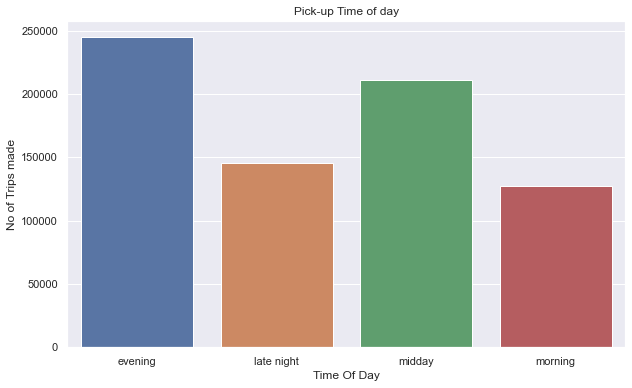

In [34]:
 # pickup distribution, by Time Of day
plt.figure(figsize=(10,6))

data = df.groupby('pickup_timezone').aggregate({'id':'count'}).reset_index()
sns.barplot(x='pickup_timezone', y='id', data=data)

plt.title('Pick-up Time of day')
plt.xlabel('Time Of Day')
plt.xticks(range(0,4), rotation='horizontal')
plt.ylabel('No of Trips made')
pass

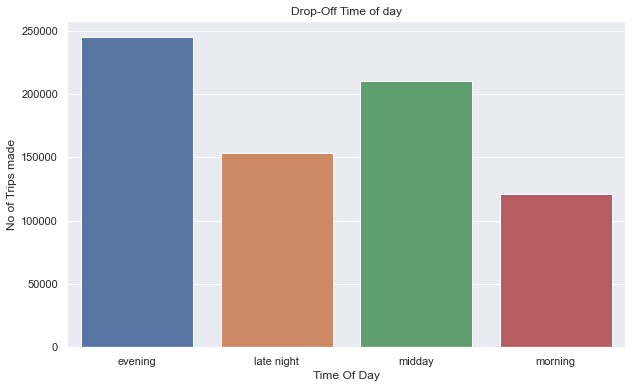

In [35]:
 # pickup distribution, by Time Of day
plt.figure(figsize=(10,6))

data = df.groupby('dropoff_timezone').aggregate({'id':'count'}).reset_index()
sns.barplot(x='dropoff_timezone', y='id', data=data)

plt.title('Drop-Off Time of day')
plt.xlabel('Time Of Day')
plt.xticks(range(0,4), rotation='horizontal')
plt.ylabel('No of Trips made')
pass

**We observe that most pickups and drops occur in the evening, while the least drops and pickups occur during morning**

**No of Trips Per Month**

In [36]:
# month (pickup and dropoff)
df['mm_pickup'] = df.pickup_datetime.dt.month.astype(np.uint8)
df['mm_dropoff'] = df.dropoff_datetime.dt.month.astype(np.uint8)

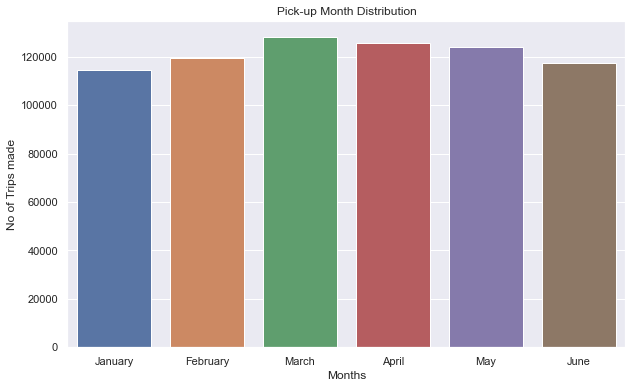

In [37]:
# pickup distribution, by months
plt.figure(figsize=(10,6))

data = df.groupby('mm_pickup').aggregate({'id':'count'}).reset_index()
sns.barplot(x='mm_pickup', y='id', data=data)

plt.title('Pick-up Month Distribution')
plt.xlabel('Months')
plt.xticks(range(0,6), mm_names[:6], rotation='horizontal')
plt.ylabel('No of Trips made')
pass

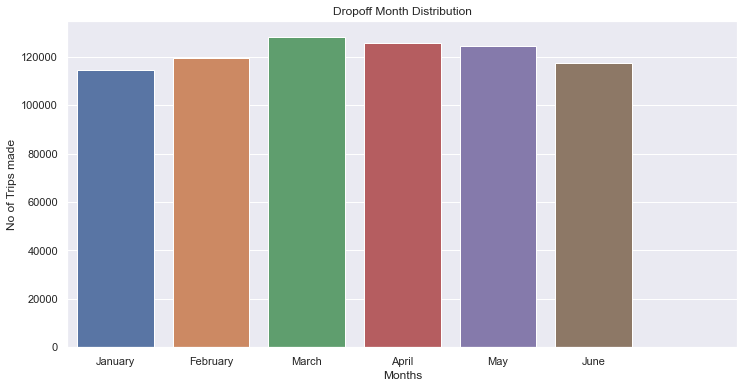

In [38]:
# dropoff distribution, by months
plt.figure(figsize=(12,6))

data = df.groupby('mm_dropoff').aggregate({'id':'count'}).reset_index()
sns.barplot(x='mm_dropoff', y='id', data=data)

plt.title('Dropoff Month Distribution')
plt.xlabel('Months')
plt.xticks(range(0,6), mm_names[:6], rotation='horizontal')
plt.ylabel('No of Trips made')
pass

**There is not much difference in the number of trips across months, although march and april has highest dropoff and pickup while january has lowest maybe because december is mostly holiday and people tarvel and go on vacation so they prefers to travel less in january**

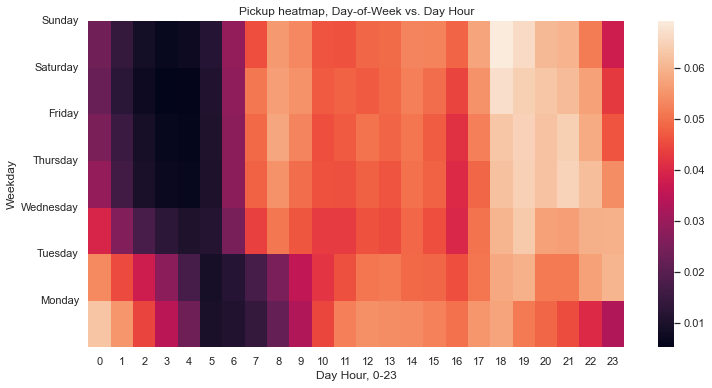

In [39]:
# Pickup heatmap, days of week vs Day hour
plt.figure(figsize=(12,6))
sns.heatmap(data=pd.crosstab(df.dow_pickup, 
                             df.hh_pickup, 
                             values=df.vendor_id, 
                             aggfunc='count',
                             normalize='index'))

plt.title('Pickup heatmap, Day-of-Week vs. Day Hour')
plt.ylabel('Weekday') ; plt.xlabel('Day Hour, 0-23')
plt.yticks(range(0,7), dow_names[::-1], rotation='horizontal')
pass

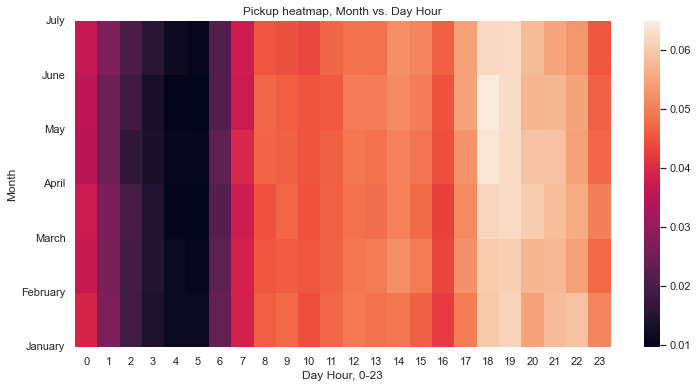

In [40]:
# Pickup heatmap, month vs hour
plt.figure(figsize=(12,6))
sns.heatmap(data=pd.crosstab(df.mm_pickup, 
                             df.hh_pickup, 
                             values=df.vendor_id, 
                             aggfunc='count',
                             normalize='index'))

plt.title('Pickup heatmap, Month vs. Day Hour')
plt.ylabel('Month') ; plt.xlabel('Day Hour, 0-23')
plt.yticks(range(0,7), mm_names[:7][::-1], rotation='horizontal')
pass



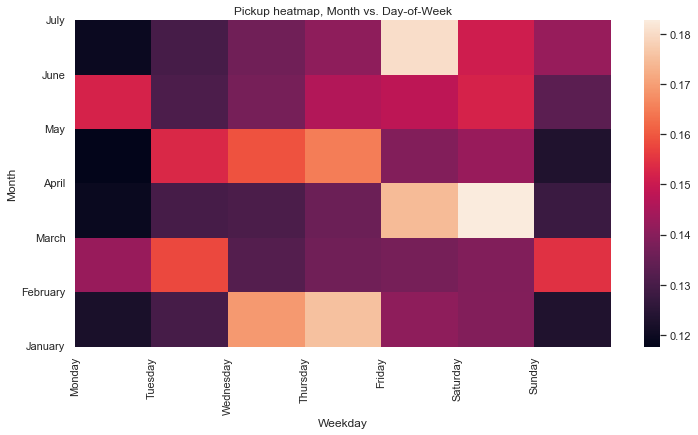

In [41]:
# Pickup heatmap, month vs dow
plt.figure(figsize=(12,6))
sns.heatmap(data=pd.crosstab(df.mm_pickup, 
                             df.dow_pickup, 
                             values=df.vendor_id, 
                             aggfunc='count',
                             normalize='index'))

plt.title('Pickup heatmap, Month vs. Day-of-Week')
plt.ylabel('Month') ; plt.xlabel('Weekday')
plt.xticks(range(0,7), dow_names, rotation='vertical')
plt.yticks(range(0,7), mm_names[:7][::-1], rotation='horizontal')
pass



**Bivariate Analysis**

**Here, we will analyse  and find relationships, patterns, and correlations between two variables**


**Trip Duration and The day of the week**

Text(0.5, 1.0, 'The Average Trip Duration per Dropoff Day of the week')

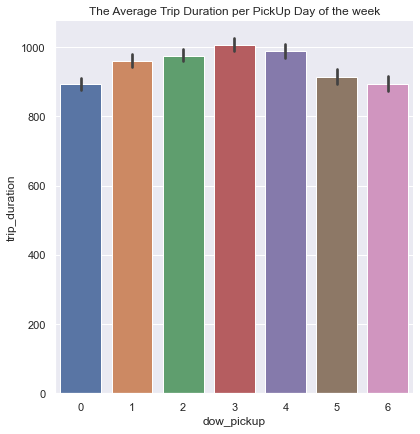

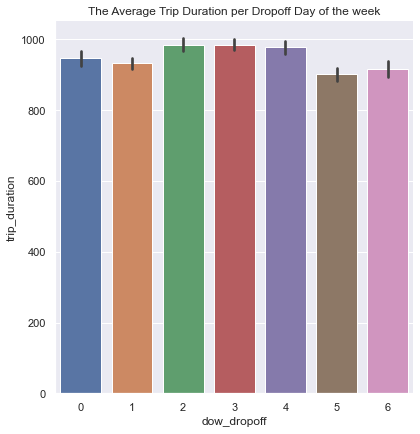

In [42]:
sns.catplot(x="dow_pickup",y="trip_duration",kind="bar",data=df,height=6,aspect=1)
plt.title('The Average Trip Duration per PickUp Day of the week')

sns.catplot(x="dow_dropoff",y="trip_duration",kind="bar",data=df,height=6,aspect=1)
plt.title('The Average Trip Duration per Dropoff Day of the week')

<AxesSubplot:xlabel='dow_pickup', ylabel='trip_duration'>

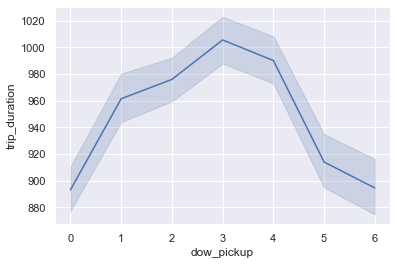

In [53]:
sns.lineplot(x='dow_pickup',y='trip_duration',data=df)

**Highest avg time taken to complete a trip is on Thursday while Monday, Saturday and Sunday takes the least time**

In [43]:
bins=np.array([0,1800,3600,5400,7200,90000])
df['duration_time']=pd.cut(df.trip_duration,bins,labels=["< 5", "5-10", "10-15","15-20",">20"])

Text(0.5, 1.0, 'The Distribution of percentage of different duration of trips')

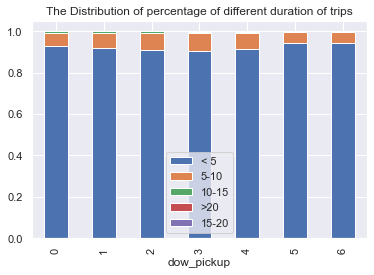

In [44]:
ax1=df.groupby('dow_pickup')['duration_time'].value_counts(normalize=True).unstack()
ax1.plot(kind='bar', stacked='True')
plt.title('The Distribution of percentage of different duration of trips')

**The graph shows a percentage distribution of the trips of different duration within each day of the week,the number of trips within 0–5 hours range is much larger for all the days**

**Trip Duration and Hour of Day**

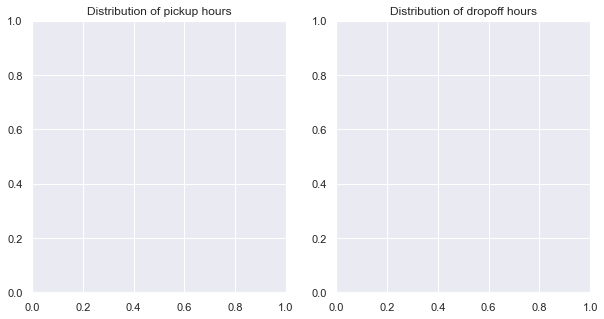

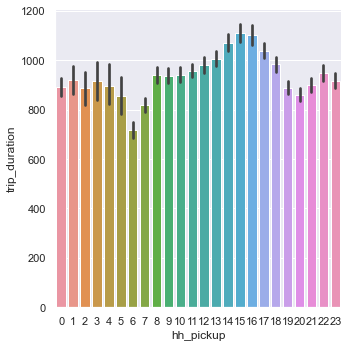

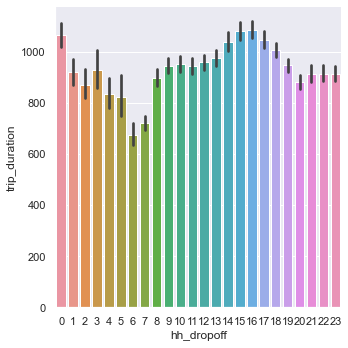

In [45]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,5))
ax1.set_title('Distribution of pickup hours')
ax=sns.catplot(x="hh_pickup", y="trip_duration",kind="bar",data=df,ax=ax1)

ax2.set_title('Distribution of dropoff hours')
ax=sns.catplot(x="hh_dropoff", y="trip_duration",kind="bar",data=df,ax=ax2)
plt.show()

**The highest average time taken to complete a trip are for trips started in midday(between 14 and 17 hours) and the least are the ones taken in the early morning(between 6–7 hours)** 

<AxesSubplot:xlabel='hh_pickup', ylabel='trip_duration'>

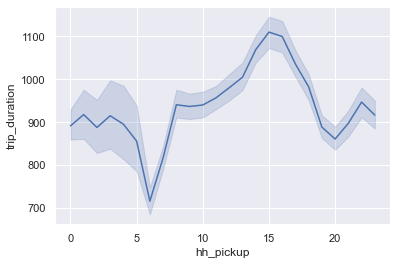

In [54]:
sns.lineplot(x='hh_pickup',y='trip_duration',data=df)

**The trip duration is the maximum around 3 pm which may be because of traffic on the roads.Trip duration is the lowest around 6 am as streets may not be busy**

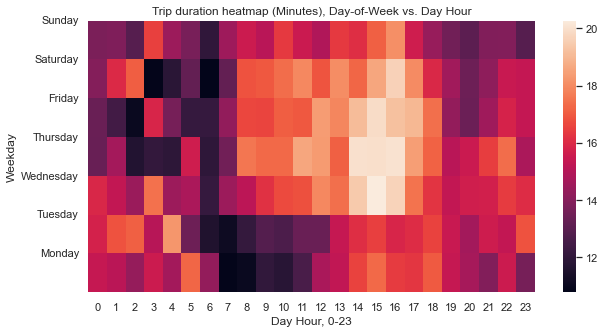

In [46]:
plt.figure(figsize=(10,5))
sns.heatmap(data=pd.crosstab(df.dow_pickup, 
                             df.hh_pickup, 
                             values=df.trip_duration/60, 
                             aggfunc='mean',
                             ))

plt.title('Trip duration heatmap (Minutes), Day-of-Week vs. Day Hour')
plt.ylabel('Weekday') ; plt.xlabel('Day Hour, 0-23')
plt.yticks(range(0,7), dow_names[::-1], rotation='horizontal')
pass

**Trip Duration per time of day**

<AxesSubplot:xlabel='pickup_timezone', ylabel='trip_duration'>

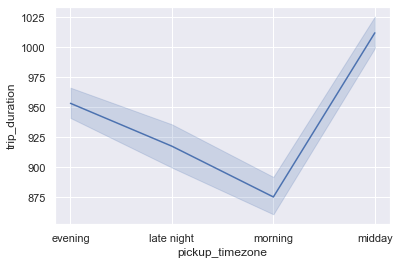

In [47]:
sns.lineplot(x='pickup_timezone',y='trip_duration',data=df)

**As we saw  in above analysis, trip duration is the maximum in the afternoon(midday) and lowest between late night and morning**

**Trip Duration per month**

<AxesSubplot:xlabel='mm_pickup', ylabel='trip_duration'>

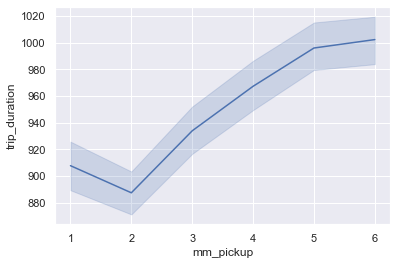

In [56]:
sns.lineplot(x='mm_pickup',y='trip_duration',data=df)

**As seen above also from February, we can see trip duration rising every month**

**Trip Duration per Vendor**

<AxesSubplot:xlabel='vendor_id', ylabel='trip_duration'>

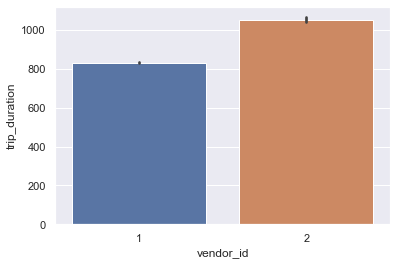

In [48]:
sns.barplot(y='trip_duration',x='vendor_id',data=df,estimator=np.mean)

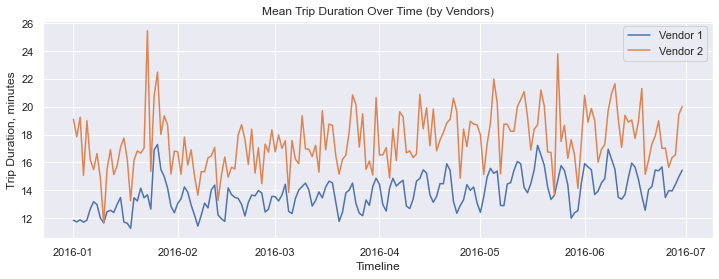

In [49]:
# trip duration over time, vendors comparison
# seems like they are almost equal
data = pd.crosstab(index=df.pickup_datetime.dt.date, 
                   columns=df.vendor_id, 
                   values=df.trip_duration/60, 
                   aggfunc='mean')
plt.figure(figsize=(12,4))
plt.title('Mean Trip Duration Over Time (by Vendors)')
plt.ylabel('Trip Duration, minutes') ; plt.xlabel('Timeline')
plt.plot(data)
plt.legend(['Vendor 1', 'Vendor 2'])
pass



**Here we see that vendor 1 mostly provides short trip duration cabs while vendor 2 provides cab for both short and long trips**

**Trip Duration per Store and Forward Flag**

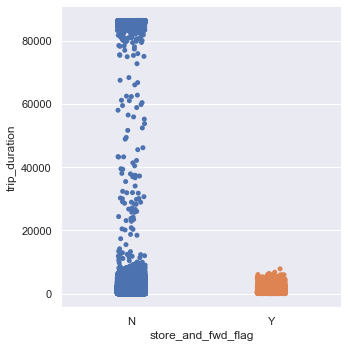

In [50]:
sns.catplot(y='trip_duration',x='store_and_fwd_flag',data=df,kind="strip")

**Thus we see the flag was stored only for short duration trips and for long duration trips the flag was never stored.**

**Trip Duration per passenger count**

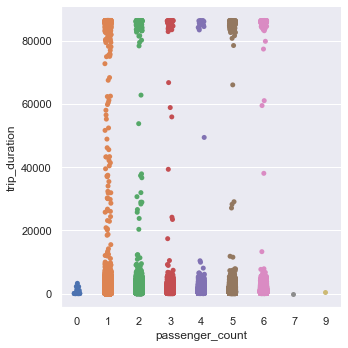

In [51]:
sns.catplot(y='trip_duration',x='passenger_count',data=df,kind='strip')

**No visible relation between trip duration and passenger count But it is noted that there are no long trips taken by higher passengers counts like 7 or 9, while the trip duration time is more or less evenly distributed only for passenger count 1**

**Passenger Count and Vendor id**

<AxesSubplot:xlabel='vendor_id', ylabel='passenger_count'>

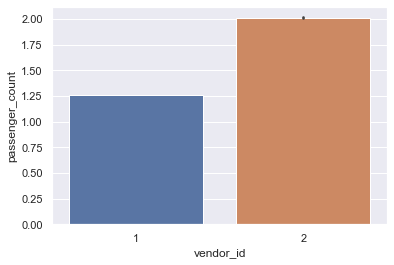

In [62]:
sns.barplot(y='passenger_count',x='vendor_id',data=df)

**We can see that vendor 2 generally carries 2 passengers while vendor 1 carries 1 passenger rides**

**Geographical location and  Trip Duration**

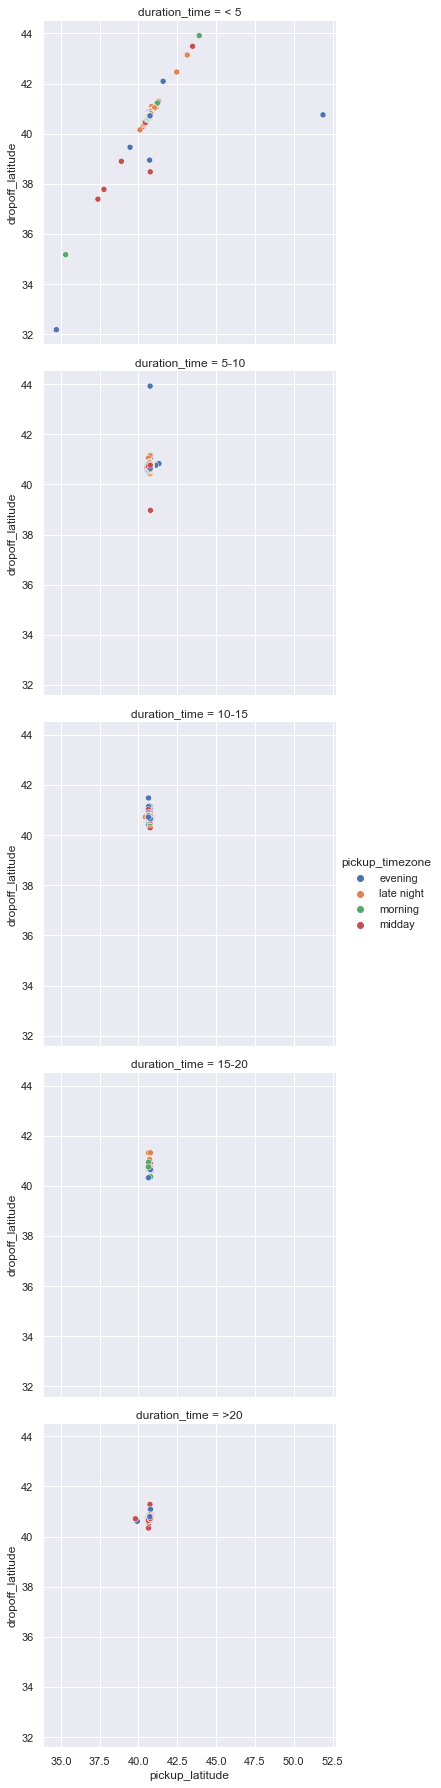

In [59]:
sns.relplot(x="pickup_latitude", y="dropoff_latitude",hue='pickup_timezone',row='duration_time',data=df);

**We get** :

**For shorter trips (<5 hours), the pickup and dropoff latitude is more or less evenly distributed between 30 ° and 40 °**

**For longer trips(>5 hours ) the pickup and dropoff latitude is all concentrated between 40 ° and 42 ° degrees**

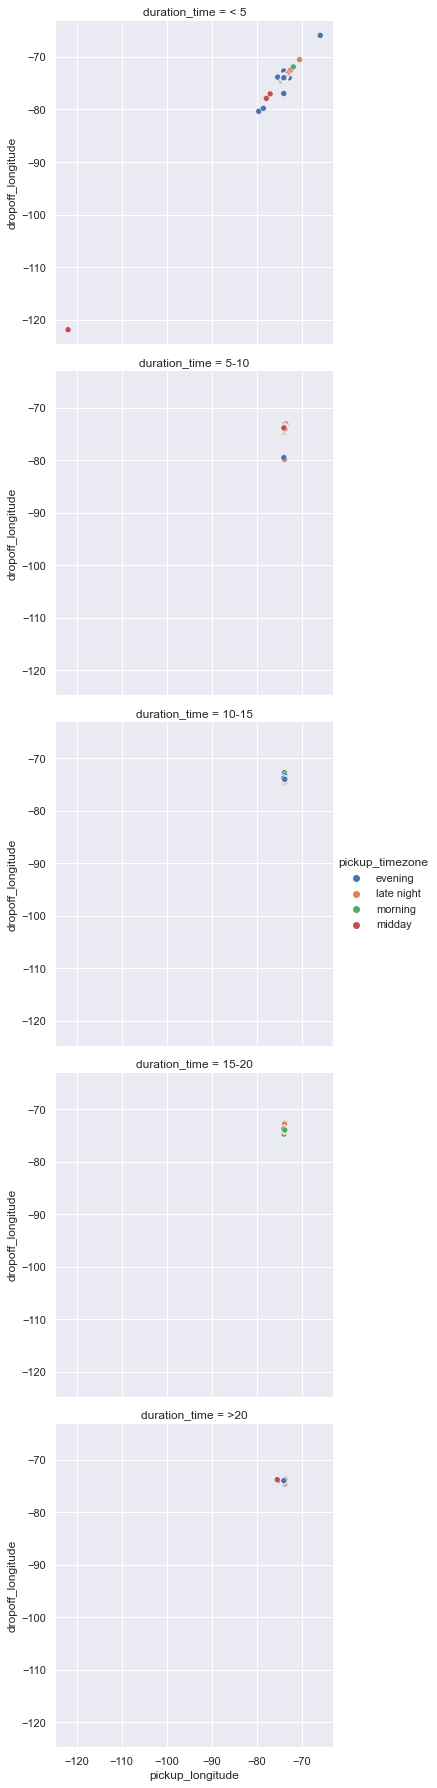

In [60]:
sns.relplot(x="pickup_longitude", y="dropoff_longitude",hue='pickup_timezone',row='duration_time',data=df);

**We Get** :

**For shorter trips (<5 hours), the pickup and dropoff longitude is more or less evenly distributed between -80 ° and -65 ° with one outlier near -120°**

**For longer trips(>5 hours) the pickup and dropoff longitude is all concentrated near -75**

**Conclusion :**

**i) Trip Duration varies a lot ranging from few seconds to more than 20 hours**

**ii)  Most trips are taken on Friday , Saturday and Thursday**
    
**iii)  The average duration of a trip is most on Thursday and Friday as trips longer than 5 hours are mostly taken in these days**

**iv) The average duration of trips started in between 14 hours and 17 hours is the largest**
    
**v)  Vendor 2 mostly provides the longer trips**
    
**vi) The long duration trips(> 5 hours) are mostly concentrated with their pickup region near (40 °,75 °) to (42°,75°)**